In [3]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from pathlib import Path

In [4]:
ANNOTATION_ROOT_0500 = Path('Mazurkas_median_x0.500/annotations_beat/')
ANNOTATION_ROOT_0630 = Path('Mazurkas_median_x0.630/annotations_beat/')
ANNOTATION_ROOT_0794 = Path('Mazurkas_median_x0.794/annotations_beat/')
ANNOTATION_ROOT_1000 = Path('Mazurkas_median_x1.000/annotations_beat/')
ANNOTATION_ROOT_1260 = Path('Mazurkas_median_x1.260/annotations_beat/')
ANNOTATION_ROOT_1588 = Path('Mazurkas_median_x1.588/annotations_beat/')
ANNOTATION_ROOT_2000 = Path('Mazurkas_median_x2.000/annotations_beat/')

FEAT_ROOT_0500 = Path('Mazurkas_median_x0.500/features/clean/')
FEAT_ROOT_0630 = Path('Mazurkas_median_x0.630/features/clean/')
FEAT_ROOT_0794 = Path('Mazurkas_median_x0.794/features/clean/')
FEAT_ROOT_1000 = Path('Mazurkas_median_x1.000/features/clean/')
FEAT_ROOT_1260 = Path('Mazurkas_median_x1.260/features/clean/')
FEAT_ROOT_1588 = Path('Mazurkas_median_x1.588/features/clean/')
FEAT_ROOT_2000 = Path('Mazurkas_median_x2.000/features/clean/')


### Helper functions
getTimestamps and loadAlignment are used in both 03_Evaluate and 04_Analysis. Might be a good idea to put them in tsm_tools?

In [5]:
def getTimestamps(annotfile):
    df = pd.read_csv(annotfile, header=None, sep='\s+', skiprows=3)
    return np.array(df[0])

In [6]:
def loadAlignment(hypfile):
    with open(hypfile, 'rb') as f:
        d = pickle.load(f)
    return d

### Graph path and cos matrix

In [7]:
def graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl):
    # construct matrix
    F1 = np.load(featfile1) # 12 x N
    F2 = np.load(featfile2) # 12 x M
    C = 1 - F1[:,0::1].T @ F2[:,0::1] # cos distance metric

    # get ground truth path
    gt1 = getTimestamps(annotfile1)
    gt2 = getTimestamps(annotfile2)
    hop_sec = 512 * 1 / 22050
    gt1 = gt1/hop_sec # convert from seconds to N and M
    gt2 = gt2/hop_sec

    # get aligned path
    hypfile = loadAlignment(aligned_pkl)

    # plot aligned path and ground truth path
    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.figure(figsize=(10,10))
    ax1.plot(hypfile[1], hypfile[0], color='black') # algorithm path
    ax1.set_title('Aligned Path')
    ax2.plot(gt2, gt1, color='red') # ground truth
    ax2.set_title('Ground Truth')

    # plot both on cos matrix
    plt.title('Aligned vs. ground truth on cos matrix')
    plt.plot(hypfile[1], hypfile[0], color='black')
    plt.plot(gt2, gt1, color='red')
    plt.imshow(C, origin = 'lower')
    
    plt.show()

#### DTW2

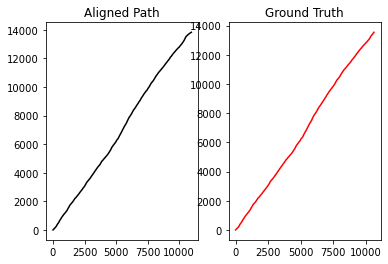

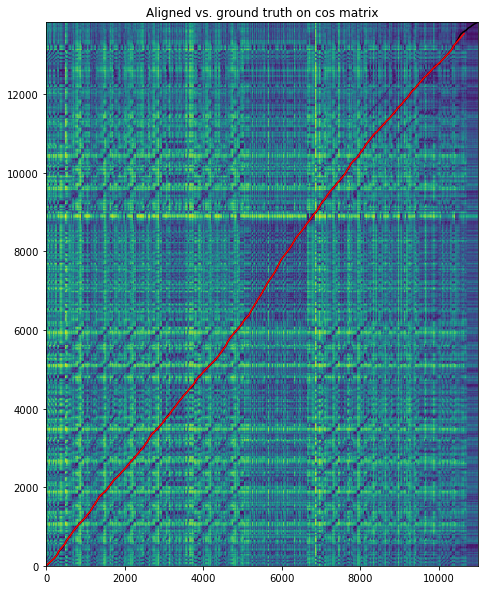

In [85]:
# SAMPLE 1
featfile1 = FEAT_ROOT_1260/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_1000/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_1260/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_1000/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x1260.x1000.DTW2/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)

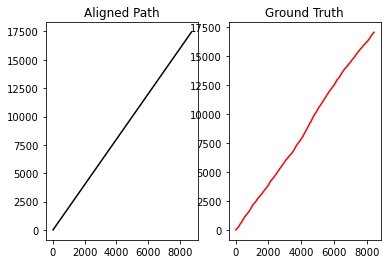

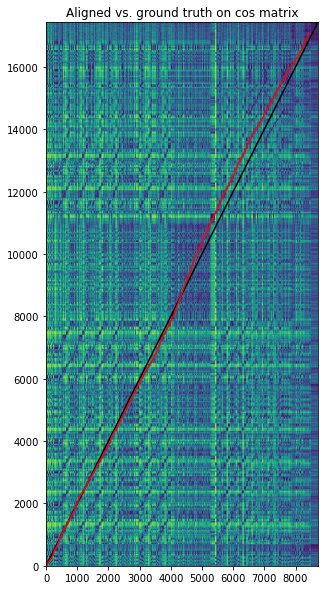

In [86]:
# SAMPLE 2
featfile1 = FEAT_ROOT_1588/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_0794/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_1588/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_0794/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x1588.x0794.DTW2/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)

#### DTW1_add4

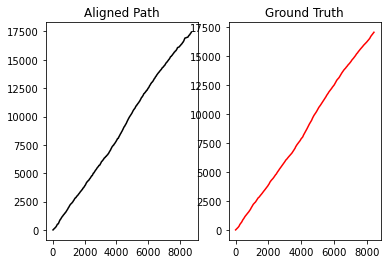

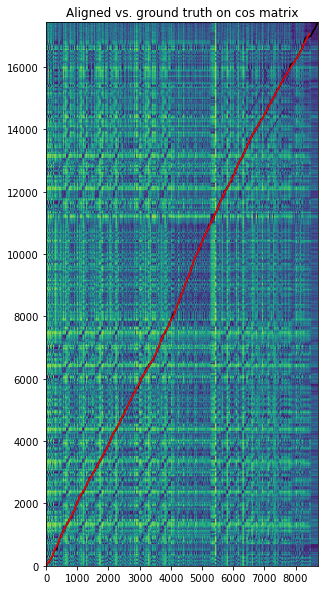

In [11]:
# SAMPLE 1
featfile1 = FEAT_ROOT_1588/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_0794/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_1588/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_0794/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x1588.x0794.DTW1_add4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)

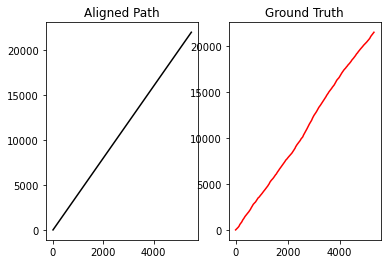

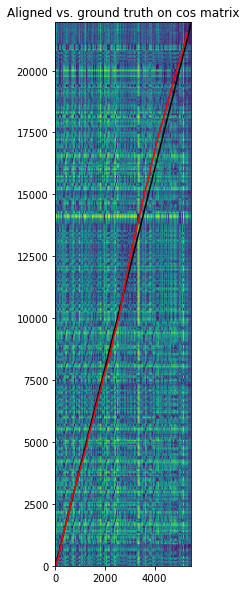

In [12]:
# SAMPLE 2
featfile1 = FEAT_ROOT_2000/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_0500/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_2000/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_0500/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x2000.x0500.DTW1_add4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)

#### DTW_downsampledQuantized, DTW_downsampleInterpolate, DTW_upsampleQuantized, DTW_upsampleInterpolate

#### DTW_adaptiveWeight2

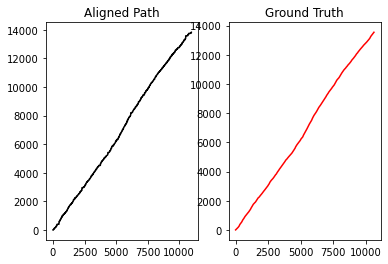

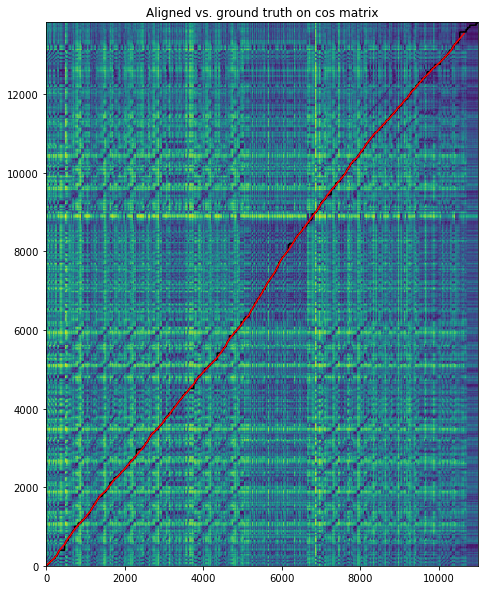

In [92]:
# SAMPLE 1
featfile1 = FEAT_ROOT_1260/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_1000/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_1260/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_1000/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x1260.x1000.DTW_adaptiveWeight2/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)

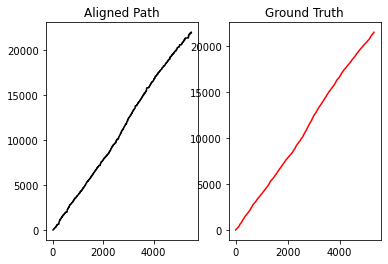

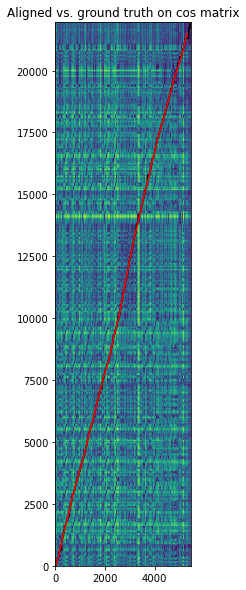

In [93]:
# SAMPLE 2
featfile1 = FEAT_ROOT_2000/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_0500/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_2000/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_0500/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x2000.x0500.DTW_adaptiveWeight2/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)

#### DTW_selectiveTransitions5

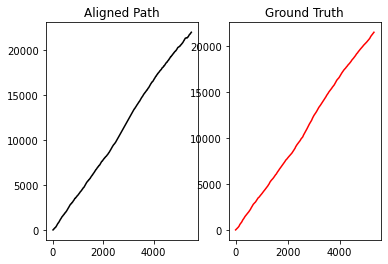

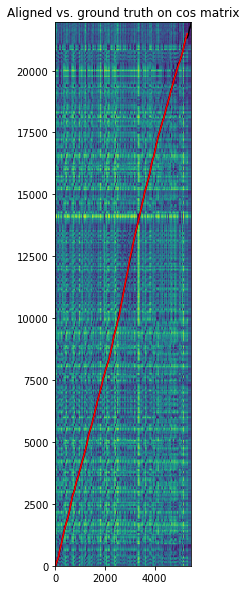

In [94]:
# SAMPLE 1
featfile1 = FEAT_ROOT_2000/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.npy'
featfile2 = FEAT_ROOT_0500/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.npy'
annotfile1 = ANNOTATION_ROOT_2000/'Chopin_Op017No4/Chopin_Op017No4_Ashkenazy-1981_pid9058-13.beat'
annotfile2 = ANNOTATION_ROOT_0500/'Chopin_Op017No4/Chopin_Op017No4_Falvay-1989_pid9068-08.beat'
aligned_pkl = 'experiments_test/train_toy.x2000.x0500.DTW_selectiveTransitions5/Chopin_Op017No4_Ashkenazy-1981_pid9058-13__Chopin_Op017No4_Falvay-1989_pid9068-08.pkl'
graph_paths(featfile1, featfile2, annotfile1, annotfile2, aligned_pkl)